# Single Article Processing 

### Our focus here is understanding quickly the content, sentiment, and subject of text/an article.

In [1]:
#Load Custom Class
from Article import Art

##### Load urls scraped from Twitter posts (see Examples/API/TwitterExample.ipynb)

In [10]:
import pandas as pd
pd.options.display.max_colwidth = 400
df = pd.read_csv('../DATA/westpactweets.csv')

Sort data by most reoccuring url, with most favourites, and most retweets.

In [11]:
base = df[df.propurl!="nourl"].\
    groupby('propurl').agg({'favs':'sum', 'rts':'sum', 'text':'count'}).\
    sort_values(['text','favs', 'rts'], ascending = False).reset_index()

##### Grab a random url

In [13]:
url = base.propurl.unique()[0]
url

'https://www.afr.com/companies/financial-services/are-westpac-s-chinese-walls-too-flimsy-for-a-solid-defence-20210511-p57qu2'

##### Create class and create analytical output

In [14]:
a = Art(url)

In [15]:
a.doc[:200]

'Masnick at the time did not agree with the characterisation and said the instance where Westpac markets trader Adam Parker asked the bank\'s treasury employee Sophie Johnston "What secrets have you got'

In [16]:
## Extractive Text Summarisation
a.summ()
a.sent_df

,text,neg,neu,pos,compound,sentiment,subjects
0,Westpac employee Sophie Johnston was one of many bankers to appear in court during ASIC's case alleging the bank manipulated the BBSW rate to benefit Westpac.,0.088,0.811,0.101,0.1027,Pos,"[Westpac employee Sophie Johnston, the bank]"
1,"Citigroup and Patrick case When ASIC brought insider trading claims against Citigroup in 2006, the investment bank successfully mounted a Chinese wall defence.",0.000,0.820,0.180,0.5574,Pos,"[Citigroup and Patrick case, ASIC, the investment bank]"
2,"But Statewide Super's decision this week to settle another ASIC case, launched earlier this year and relating to mis-selling insurance, shows that the best interests duty, required of all super funds, often has some unusual applications.",0.000,0.675,0.325,0.9468,Pos,"[Statewide Super's decision this week to settle another ASIC case, the best interests duty, required of all super funds,]"


In [9]:
## Named Entity Recognition
a.ner()
a.ner_df[:10]

,Text,Likely Entity Type,Count
0,ACCC,ORG,8
6,MyRepublic,ORG,6
8,NBN,ORG,4
2,Australian,NORP,2
4,Gizmodo Australia,ORG,2
1,Aussie Broadband,ORG,1
3,Exetel,ORG,1
5,Measuring Broadband Australia,ORG,1
7,MyRepublic NBN,ORG,1
9,Optus,ORG,1


In [17]:
## The fun of wordclouds
a.wordcloud()

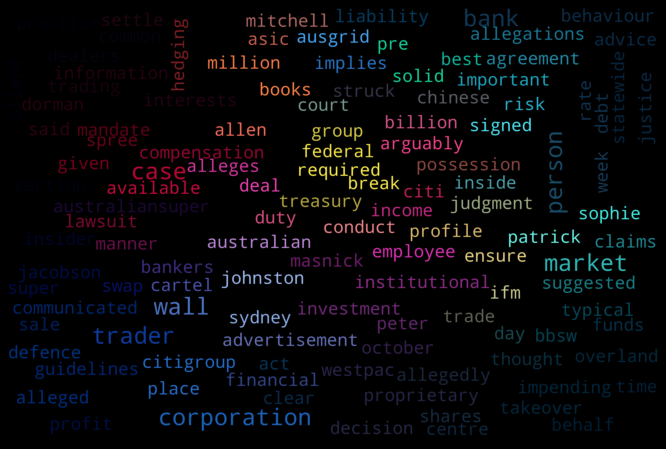

In [18]:
a.show_cloud()